### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter

### Reading from csv and converting the object to necessary data type

In [2]:
myData = pd.read_csv("Water_Consumption_And_Cost__2013_-_Feb_2022_.csv")

myData['Current Charges']=myData['Current Charges'].str.replace(',', '').astype(float)
myData['Consumption (HCF)']=myData['Consumption (HCF)'].str.replace(',', '').astype(float)
myData["Revenue Month"] = pd.to_datetime(myData["Revenue Month"],format='%Y-%m')


### Seperating the values in terms of borough

In [16]:
manhattan_df= myData.loc[myData['Borough']=='MANHATTAN']
queens_df= myData.loc[myData['Borough']=='QUEENS']
brooklyn_df= myData.loc[myData['Borough']=='BROOKLYN']
bronx_df= myData.loc[myData['Borough']=='BRONX']
fha_df=myData.loc[myData['Borough']=='FHA']
staten_island_df= myData.loc[myData['Borough']=='STATEN ISLAND']
non_development_facility_df = myData.loc[myData['Borough']=='NON DEVELOPMENT FACILITY']

manhattan_df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (HCF),Water&Sewer Charges,Other Charges
709,FORT WASHINGTON AVENUE REHAB,MANHATTAN,FORT WASHINGTON AVENUE REHAB,BLD 01,AMR,BLD 01 - STORE 1-2,309.0,341,M030900,FEDERAL,NY005013090P,NEW YORK CITY WATER BOARD,8562307,2020-01-01,12/23/2019,01/26/2020,34,K13203068,N,15583.82,Basic Water and Sewer,Yes,1508.0,"15,583.82",0
710,FORT WASHINGTON AVENUE REHAB,MANHATTAN,FORT WASHINGTON AVENUE REHAB,BLD 01,AMR,BLD 01 - STORE 1-2,309.0,341,M030900,FEDERAL,NY005013090P,NEW YORK CITY WATER BOARD,8667079,2020-02-01,01/26/2020,02/24/2020,29,K13203068,N,18704.72,Basic Water and Sewer,Yes,1810.0,"18,704.72",0
711,FORT WASHINGTON AVENUE REHAB,MANHATTAN,FORT WASHINGTON AVENUE REHAB,BLD 01,AMR,BLD 01 - STORE 1-2,309.0,341,M030900,FEDERAL,NY005013090P,NEW YORK CITY WATER BOARD,8759749,2020-03-01,02/24/2020,03/23/2020,28,K13203068,N,13816.69,Basic Water and Sewer,Yes,1337.0,"13,816.69",0
712,FORT WASHINGTON AVENUE REHAB,MANHATTAN,FORT WASHINGTON AVENUE REHAB,BLD 01,AMR,BLD 01 - STORE 1-2,309.0,341,M030900,FEDERAL,NY005013090P,NEW YORK CITY WATER BOARD,8870742,2020-04-01,03/23/2020,04/23/2020,31,K13203068,N,13175.98,Basic Water and Sewer,Yes,1275.0,"13,175.98",0
713,GOMPERS,MANHATTAN,GOMPERS,BLD 03 - Community Center,AMR,Community Center,100.0,237,M010000,FEDERAL,NY005011000P,NEW YORK CITY WATER BOARD,8560927,2020-01-01,12/23/2019,01/26/2020,34,E20437524,N,43.15,Basic Water and Sewer,Yes,0.0,0,43.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46702,WSUR (SITE C) 589 AMSTERDAM AVENUE,MANHATTAN,WEST SIDE URBAN RENEWAL (SITE C),NaN,NaN,NaN,174.0,259,M017400,FEDERAL,NY005011270P,NEW YORK CITY WATER BOARD,10808242,2021-12-01,11/19/2021,12/20/2021,31,K17790565,N,12827.75,Basic Water and Sewer,Yes,1208.0,"12,827.75",0
46703,WSUR (SITE C) 589 AMSTERDAM AVENUE,MANHATTAN,WEST SIDE URBAN RENEWAL (SITE C),NaN,NaN,NaN,174.0,259,M017400,FEDERAL,NY005011270P,NEW YORK CITY WATER BOARD,10900052,2022-01-01,12/20/2021,01/19/2022,30,K17047313,N,8728.82,Basic Water and Sewer,Yes,822.0,"8,728.82",0
46704,WSUR (SITE C) 589 AMSTERDAM AVENUE,MANHATTAN,WEST SIDE URBAN RENEWAL (SITE C),NaN,NaN,NaN,174.0,259,M017400,FEDERAL,NY005011270P,NEW YORK CITY WATER BOARD,10900052,2022-01-01,12/21/2021,01/19/2022,29,K17790565,N,10767.67,Basic Water and Sewer,Yes,1014.0,"10,767.67",0
46705,WSUR (SITE C) 589 AMSTERDAM AVENUE,MANHATTAN,WEST SIDE URBAN RENEWAL (SITE C),NaN,NaN,NaN,174.0,259,M017400,FEDERAL,NY005011270P,NEW YORK CITY WATER BOARD,11011083,2022-02-01,01/19/2022,02/16/2022,28,K17047313,N,8367.77,Basic Water and Sewer,Exception,788.0,"8,367.77",0


In [4]:
pd.set_option('display.max_rows', manhattan_df.shape[0]+1)
pd.set_option('display.max_colum', manhattan_df.shape[0]+1)
# manhattan_df

### Finding the unique meter number of manhattan (List of Building)

In [18]:
manhattan_uniqueMeterNumbers = manhattan_df['Meter Number'].unique()
print('Manhattan : ', len(manhattan_uniqueMeterNumbers))

queens_uniqueMeterNumbers = queens_df['Meter Number'].unique()
print('Queens : ', len(queens_uniqueMeterNumbers))

brooklyn_uniqueMeterNumbers = brooklyn_df['Meter Number'].unique()
print('Brooklyn : ', len(brooklyn_uniqueMeterNumbers))

bronx_uniqueMeterNumbers = bronx_df['Meter Number'].unique()
print('Bronx : ', len(bronx_uniqueMeterNumbers))

staten_uniqueMeterNumbers = staten_island_df['Meter Number'].unique()
print('Staten Island : ', len(staten_uniqueMeterNumbers))

fha_uniqueMeterNumbers = fha_df['Meter Number'].unique()
print('FHA : ', len(fha_uniqueMeterNumbers))


total_uniqueMeterNumbers = myData['Meter Number'].unique()
print('Total : ', len(total_uniqueMeterNumbers))


# print('Total number of unique building are:', len(uniqueMeterNumbers))
# print('List of unique building is: ',uniqueMeterNumbers )

Manhattan :  130
Queens :  81
Brooklyn :  177
Bronx :  98
Staten Island :  2
FHA :  280
Total :  768


### Sorting

In [6]:
#Sorting via Revenue Month of manhattan data base
manhattan_sort_df=manhattan_df.sort_values(by='Revenue Month')
pd.set_option('display.max_rows', manhattan_sort_df.shape[0]+1)
# manhattan_sort_df[["Revenue Month","Current Charges","Consumption (HCF)"]]

### Lets get the monthly overview of each data set 
### 1. Whole data set (All data we have)

In [7]:
myData_monthly_mean = myData.groupby(myData['Revenue Month'].dt.month)['Consumption (HCF)','Current Charges'].mean()
pd.set_option('display.max_rows', myData_monthly_mean.shape[0]+1)
print(myData_monthly_mean)

               Consumption (HCF)  Current Charges
Revenue Month                                    
1                     235.749888      2313.615678
2                     218.061123      2155.429900
3                     194.555467      1919.038557
4                     229.304327      2207.974161
5                     202.988071      1982.471188
6                     257.239370      2502.951368
7                     211.635089      2161.651717
8                     230.856990      1914.010831
9                     335.876311      2184.157220
10                    184.355640      1838.665807
11                    203.437788      2028.576731
12                    203.185266      1985.863291


/var/folders/_5/_kmyf6q520g8kcp4cszs294m0000gn/T/ipykernel_21353/2670273025.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  myData_monthly_mean = myData.groupby(myData['Revenue Month'].dt.month)['Consumption (HCF)','Current Charges'].mean()


For Current Charges


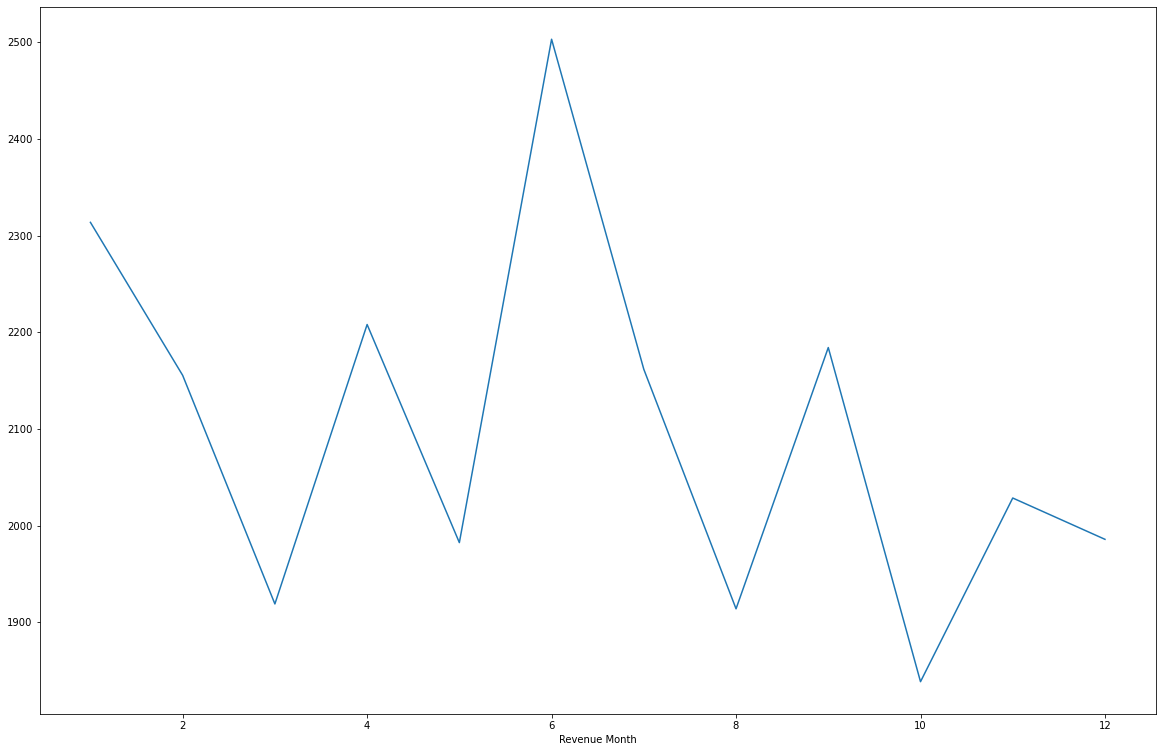

Consumption (HCF)


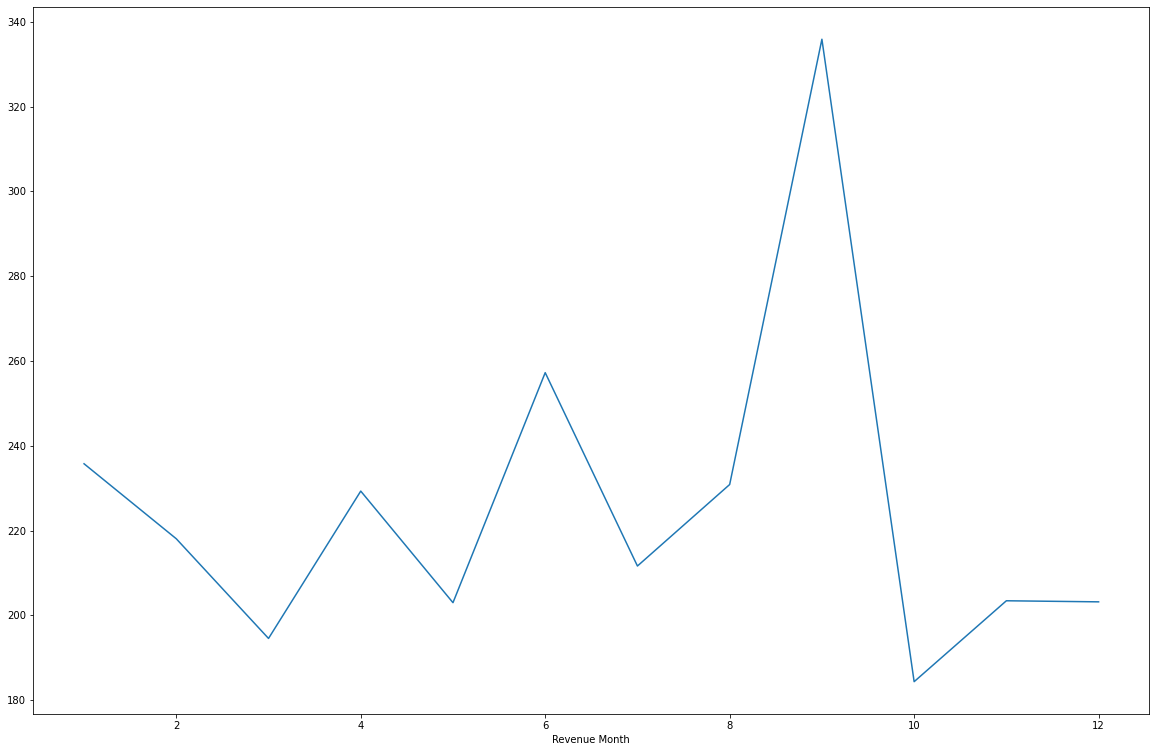

In [8]:
print('For Current Charges')
myData_monthly_mean1 = myData.groupby(myData['Revenue Month'].dt.month)['Current Charges'].mean()
plt.rcParams['figure.figsize'] = (20, 13)
myData_monthly_mean1.plot(x="Revenue Month", y="Current Charges")
plt.show() # Graphing show of Current Charges
print('Consumption (HCF)')
myData_monthly_mean1 = myData.groupby(myData['Revenue Month'].dt.month)['Consumption (HCF)'].mean()
myData_monthly_mean1.plot(x="Revenue Month", y="Consumption (HCF)")
plt.show() # Graphing show of Current Charges

***Analysis:*** If we genrally analyze the data set, we can see that there is a gradual increase in consumption of water in summer time. Also, it is decreasing rapidly in the winter time. Specifically consumption in the month June and September looks higher. In the month of November and december consumption is decreasing rapidly. 



### 2. Manhattan data set 

In [9]:
manhattan_monthly_mean = manhattan_sort_df.groupby(manhattan_sort_df['Revenue Month'].dt.month)['Consumption (HCF)', 'Current Charges'].mean()
print(manhattan_monthly_mean)

               Consumption (HCF)  Current Charges
Revenue Month                                    
1                     405.478502      4013.064924
2                     422.689349      4185.006479
3                     344.156250      3423.042319
4                     421.660091      4090.335038
5                     396.960443      3905.060506
6                     418.288786      4172.544624
7                     418.957237      4650.969836
8                     369.295987      3681.435669
9                    1159.734426      4559.211230
10                    357.463455      3582.018372
11                    393.637540      3940.036392
12                    409.918469      3867.028536


/var/folders/_5/_kmyf6q520g8kcp4cszs294m0000gn/T/ipykernel_21353/3424712791.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  manhattan_monthly_mean = manhattan_sort_df.groupby(manhattan_sort_df['Revenue Month'].dt.month)['Consumption (HCF)', 'Current Charges'].mean()


For Current Charges


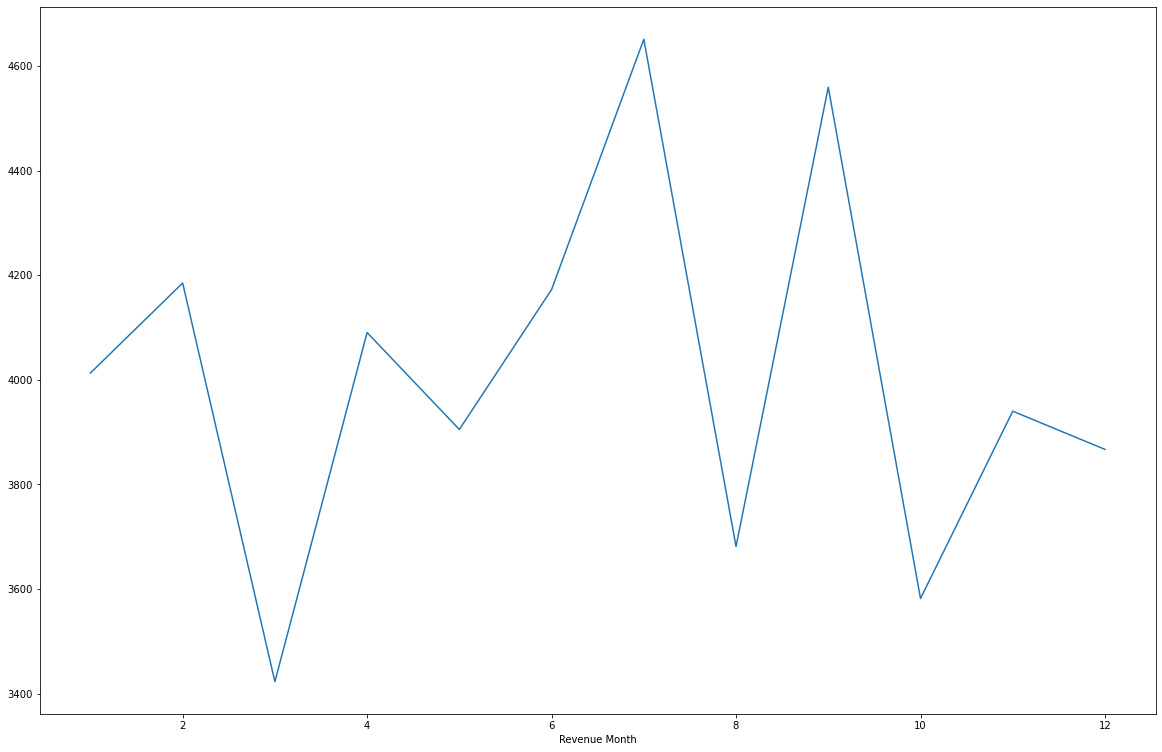

Consumption (HCF)


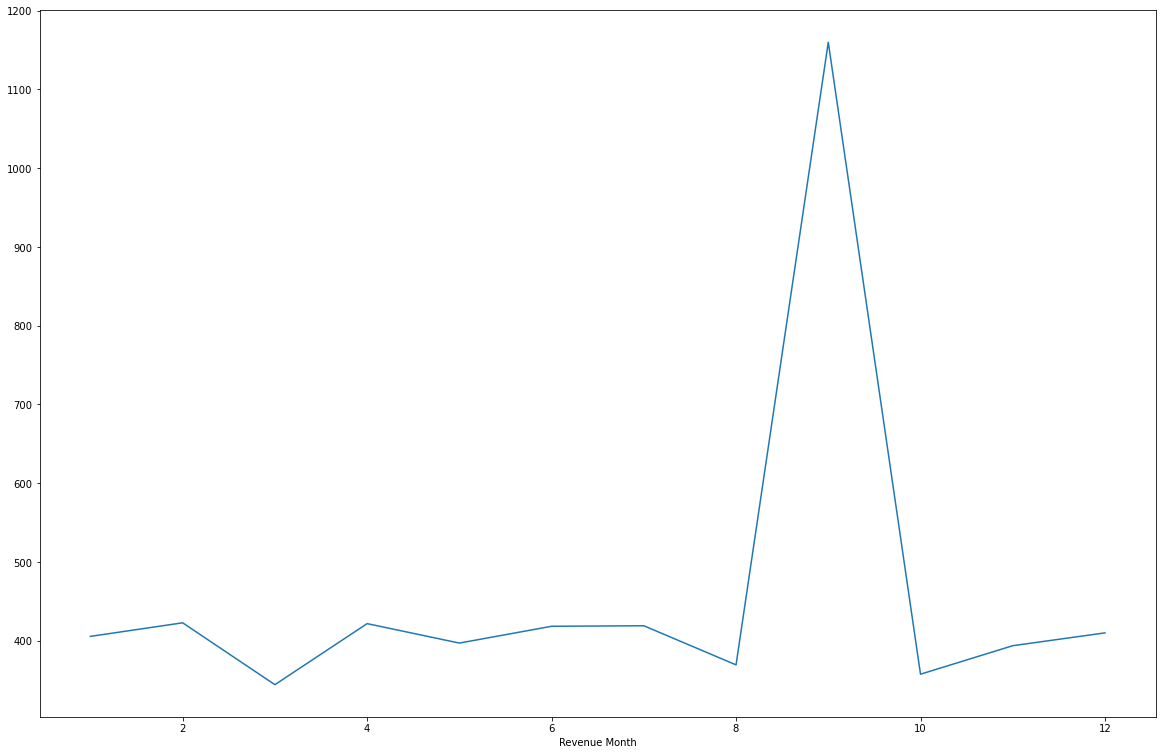

In [10]:
print('For Current Charges')
manhattan_monthly_mean1 = manhattan_sort_df.groupby(manhattan_sort_df['Revenue Month'].dt.month)['Current Charges'].mean()




manhattan_monthly_mean1.plot(x="Revenue Month", y=["Current Charges"])

plt.show() # Graphing show of Current Charges
print('Consumption (HCF)')
manhattan_monthly_mean2 = manhattan_sort_df.groupby(manhattan_sort_df['Revenue Month'].dt.month)['Consumption (HCF)'].mean()
manhattan_monthly_mean2.plot(x="Revenue Month", y="Consumption (HCF)")
plt.show() # Graphing show of Current Charges

***Analysis:*** In manhattan, the consumption of water in summer looks higher than winter. The highest average consumption in manhattan is in sepetermebr which matches the overall data set. When there is change in season, it looks that people consume dractically less amount and slowly they get back to normal. It means that change in weather plays a vitual role in consumption of the water. 

### 3. Main Analysis

1. First we running for loop for each unique meter number 
2. For each unique meter number, we are seperating the informations (collecting informations seperately)
3. Plotting each informations in graph(Revenue Month vs Current Charges and Revenue Month vs Consumption (HCF))
4. Collecting the details from the data (For eg: std, mean, max, count etc.)
5. calculating the montly means from the overall data set of sepcifc building. 
6. Graph of average consumption and charges per month

In [11]:
for i in range(len(uniqueMeterNumbers)): #1
    building_df = manhattan_sort_df.loc[manhattan_sort_df['Meter Number']==uniqueMeterNumbers[i]] #2
#     print(building_df) # printing all the rows and column. 
    plt.rcParams['figure.figsize'] = (20, 13) #Size of graph #3
    
    print('For Meter number: ', uniqueMeterNumbers[i] )
    building_df.plot(x="Revenue Month", y=["Current Charges","Consumption (HCF)"])
    
#     #defines the tick location 
#     ax.xaxis.set_major_locator(MonthLocator())
#     #defines the label format
#     ax.xaxis.set_major_formatter(DateFormatter("%m-%y"))
#     ax.tick_params(axis="x", labelrotation= 90)
#     plt.tight_layout()
    
    plt.show() # Graphing show of Current Charges
#     building_df.plot(x="Revenue Month", y="Consumption (HCF)")
#     plt.show() # Graphing show of Consumption (HCF)
    print(building_df.describe()) # describing the nature #4
    print('-'*100)
    
    
    print('-'*100)
    pd.set_option('display.max_rows', building_df.shape[0]+1) #disply all the rows 
    building_monthly_mean = building_df.groupby(building_df['Revenue Month'].dt.month)['Consumption (HCF)', 'Current Charges'].mean()#5
    print('Average Results')
    print(building_monthly_mean)
    print(building_df[["Revenue Month","Current Charges","Consumption (HCF)"]]) # display three columns

    #5
    print('For Current Charges')
    building_df1 = building_df.groupby(building_df['Revenue Month'].dt.month)['Current Charges'].mean()
    building_df1.plot(x="Revenue Month", y="Current Charges")
    
    
    plt.show() # Graphing show of Current Charges
    print('Consumption (HCF)')
    building_df2 = building_df.groupby(building_df['Revenue Month'].dt.month)['Consumption (HCF)'].mean()
    building_df2.plot(x="Revenue Month", y="Consumption (HCF)")
    plt.show() # Graphing show of Current Charges
    print('-'*100)
    print('-'*100)

NameError: name 'uniqueMeterNumbers' is not defined

In [ ]:
for i in range(len(uniqueMeterNumbers)): #1
    building_df = manhattan_sort_df.loc[manhattan_sort_df['Meter Number']==uniqueMeterNumbers[i]]
    a= building_df['Location'].head(1)
    print(a)

In [ ]:
##comparing sorted vs un sorted 
# building_df = myData.loc[myData['Meter Number']==uniqueMeterNumbers[0]]
# building_df1 = myData_sort.loc[myData['Meter Number']==uniqueMeterNumbers[0]]
# print(building_df)
# print(building_df1)
# plt.rcParams['figure.figsize'] = (20, 13)
# print('For Meter number: ', uniqueMeterNumbers[i] )
# building_df.plot(x="Revenue Month", y="Current Charges")
# plt.show()
# building_df1.plot(x="Revenue Month", y="Current Charges")
# plt.show()
# print(building_df.describe())
# print('-'*100)